In [168]:
import pandas as pd

In [184]:
results_df = pd.read_csv('1976-2016-president.csv')


In [185]:
results_df.head(10)

##Creating a dictionary of state-state abbr entries to be used across the notebook
states = results_df[results_df.year.isin([2016])]
states = states.filter(items = ['state','state_po'])
states = states.drop_duplicates()
states = states.set_index('state')

swing_states = ['CO','FL','MI','IA','MN','NV','NH','NC','OH','PA','VA','WI','AZ','GA']

In [186]:
years = [2012]
parties = ['democrat', 'republican']

lean_2016 = results_df[results_df.year.isin(years)]
lean_2016 = lean_2016[lean_2016.party.isin(parties)]

##Some duplicate entries (probably faithless elector votes)
#lean_2016[(results_df['year']==2004) & (lean_2016['state_po'] == 'MD')]
#lean_2016[(results_df['year']==2016) & (lean_2016['state_po'] == 'AZ')]
#lean_2016[(results_df['year']==2016) & (lean_2016['state_po'] == 'MD')]


lean_2016['vote_share'] = round(100 * (lean_2016['candidatevotes']/lean_2016['totalvotes']),2) 
lean_2016 = lean_2016[lean_2016['vote_share'] > 1]  #Few electors voted for Kasich/Sanders
lean_2016 = lean_2016.filter(items = ['year','state_po','party','vote_share'])
lean_2016 = lean_2016.set_index(['year','state_po','party'],verify_integrity=True)

lean_2016 = lean_2016.unstack(level='party')
lean_2016['partisan_lean'] = lean_2016['vote_share']['democrat'] - lean_2016['vote_share']['republican'] 

lean_by_state_2016 = lean_2016.groupby('state_po')['partisan_lean'].mean().to_frame()
lean_by_state_2016.sort_values(by=['partisan_lean'])

lean_by_state_2016

,partisan_lean
state_po,
AK,-13.99
AL,-22.19
AR,-23.69
AZ,-9.06
CA,23.12
CO,5.36
CT,17.34
DC,83.63
DE,18.63


In [181]:
dem_event_2016 = pd.read_csv('2016_clinton_kaine_campaign_events.csv')
rep_event_2016 = pd.read_csv('2016_trump_pence_events.csv')

dem_event_2016 = dem_event_2016.set_index('state')
dem_event_2016 = dem_event_2016.rename(columns={"event_count": "dem_event_count"}, errors="raise")
rep_event_2016 = rep_event_2016.set_index('state')
rep_event_2016 = rep_event_2016.rename(columns={"event_count": "rep_event_count"}, errors="raise")

dem_event_2016 = dem_event_2016.join(states)
dem_event_2016 = dem_event_2016.set_index('state_po')

rep_event_2016 = rep_event_2016.join(states)
rep_event_2016 = rep_event_2016.set_index('state_po')

lean_by_state_2016 = lean_by_state_2016.join(dem_event_2016)
lean_by_state_2016 = lean_by_state_2016.join(rep_event_2016)

lean_by_state_2016['dem_event_count'] = lean_by_state_2016['dem_event_count'].fillna(0)
lean_by_state_2016['rep_event_count'] = lean_by_state_2016['rep_event_count'].fillna(0)

lean_by_state_2016

,partisan_lean,dem_event_count,rep_event_count
state_po,,,
AK,-13.99,0.0,0.0
AL,-22.19,0.0,0.0
AR,-23.69,0.0,0.0
AZ,-9.06,3.0,7.0
CA,23.12,0.0,1.0
CO,5.36,3.0,16.0
CT,17.34,0.0,1.0
DC,83.63,0.0,0.0
DE,18.63,0.0,0.0


In [182]:

margin_2016 = results_df[results_df.year.isin([2016])]

margin_2016 = margin_2016[margin_2016.party.isin(parties)]
margin_2016['vote_share'] = round(100 * (margin_2016['candidatevotes']/margin_2016['totalvotes']),2) 
margin_2016 = margin_2016[margin_2016['vote_share'] > 1] ##There were a few people who voted for Sanders/Kasich in 2016

margin_2016 = margin_2016.filter(items = ['year','state_po','party','vote_share'])
margin_2016 = margin_2016.set_index(['year','state_po','party'],verify_integrity=True)

margin_2016 = margin_2016.unstack(level='party')

margin_2016['margin'] = margin_2016['vote_share']['democrat'] - margin_2016['vote_share']['republican'] 

margin_2016 = margin_2016.groupby('state_po')['margin'].mean().to_frame()
margin_2016 = margin_2016.sort_values(by=['margin'])

lean_by_state_2016 = lean_by_state_2016.join(margin_2016)


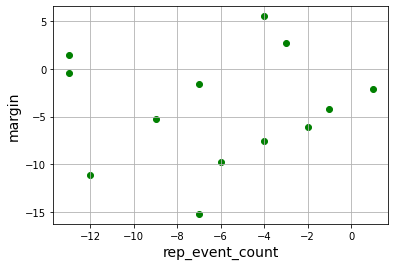

,partisan_lean,dem_event_count,rep_event_count,margin,event_count_diff
state_po,,,,,
CO,5.36,3.0,16.0,4.91,-13.0
FL,0.88,36.0,35.0,-1.20,1.0
MI,9.50,8.0,14.0,-0.23,-6.0
IA,5.81,7.0,14.0,-9.41,-7.0
MN,NaN,0.0,2.0,1.52,-2.0
NV,6.68,8.0,9.0,2.42,-1.0
NH,5.58,6.0,15.0,0.37,-9.0
NC,-2.04,24.0,31.0,-3.66,-7.0
OH,2.98,18.0,30.0,-8.13,-12.0


In [183]:
import matplotlib.pyplot as plt

swing_state_lean_2016 = lean_by_state_2016.loc[swing_states]

swing_state_lean_2016['event_count_diff'] = swing_state_lean_2016['dem_event_count'] - swing_state_lean_2016['rep_event_count']

plt.scatter(swing_state_lean_2016['event_count_diff'], swing_state_lean_2016['margin'] - swing_state_lean_2016['partisan_lean'], color='green')
#plt.title('rep_event_count Vs margin_of_victory', fontsize=14)
plt.xlabel('rep_event_count', fontsize=14)
plt.ylabel('margin', fontsize=14)
plt.grid(True)
plt.show()

swing_state_lean_2016

In [176]:
from sklearn import linear_model
#import statsmodels.api as sm

X = swing_state_lean_2016[['partisan_lean','event_count_diff']] 
Y = swing_state_lean_2016['margin']

regr = linear_model.LinearRegression()
regr.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:

regr.predict([[12, 7]])


array([-0.33324649])